In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [49]:
# Locate the CSV file to be read.
spotify_data_path = "Resources/data.csv"

# Read the Spotify songs data.
spotify_data = pd.read_csv(spotify_data_path)

In [50]:
smaller_df = spotify_data[["name", "artists", "year", "popularity"]]
smaller_df

,name,artists,year,popularity
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4
1,Clancy Lowered the Boom,['Dennis Day'],1921,5
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5
3,Danny Boy,['Frank Parker'],1921,3
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2
...,...,...,...,...
170648,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72
170649,Halloweenie III: Seven Days,['Ashnikko'],2020,68
170650,AYA,['MAMAMOO'],2020,76
170651,Darkness,['Eminem'],2020,70


In [51]:
# Establish the bins.
decade_bins = [1921, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "2000s", "2010s"]

In [52]:
# Use "pd.cut" to categorize popularity based on the bins.
smaller_df["Decade"] = pd.cut(smaller_df["year"], decade_bins, labels=labels, include_lowest=True)
smaller_df.head()

C:\Users\16626\AppData\Local\Temp\ipykernel_18292\9011117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df["Decade"] = pd.cut(smaller_df["year"], decade_bins, labels=labels, include_lowest=True)


,name,artists,year,popularity,Decade
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s
3,Danny Boy,['Frank Parker'],1921,3,20s
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s


In [53]:
# Group by "Decade" and find the mean popularity of songs for each decade.
decade_popularity = pd.DataFrame(smaller_df.groupby(["Decade"]).mean()["popularity"])
decade_popularity

,popularity
Decade,
20s,1.201277
30s,2.524571
40s,2.172324
50s,12.305838
60s,27.983603
70s,35.234586
80s,37.980302
90s,44.780833
2000s,50.343601


In [80]:
# Add the Instrumentalness, Loudness, and Acousticness columns to the "smaller_df" DataFrame and match them by index.
decade_with_variables = pd.merge(smaller_df, spotify_data[["instrumentalness", "loudness", "acousticness","liveness","energy","tempo","speechiness","mode","key","explicit","duration_ms","danceability","valence"]], left_index=True, right_index=True)
decade_with_variables.head()

,name,artists,year,popularity,Decade,instrumentalness,loudness,acousticness,liveness,energy,tempo,speechiness,mode,key,explicit,duration_ms,danceability,valence
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s,0.878000,-20.096,0.982,0.665,0.211,80.954,0.0366,1,10,0,831667,0.279,0.0594
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s,0.000000,-12.441,0.732,0.160,0.341,60.936,0.4150,1,7,0,180533,0.819,0.9630
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s,0.913000,-14.850,0.961,0.101,0.166,110.339,0.0339,1,3,0,500062,0.328,0.0394
3,Danny Boy,['Frank Parker'],1921,3,20s,0.000028,-9.316,0.967,0.381,0.309,100.109,0.0354,1,5,0,210000,0.275,0.1650
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s,0.000002,-10.096,0.957,0.229,0.193,101.665,0.0380,1,3,0,166693,0.418,0.2530


In [55]:
# Figure out the mean instrumentalness for each decade.
decade_instrumentalness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["instrumentalness"])
decade_instrumentalness

,instrumentalness
Decade,
20s,0.370365
30s,0.269956
40s,0.353832
50s,0.241384
60s,0.152754
70s,0.116118
80s,0.121991
90s,0.107280
2000s,0.082040


In [56]:
# Figure out the mean loudness for each decade.
decade_loudness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["loudness"])
decade_loudness

,loudness
Decade,
20s,-15.653889
30s,-14.373277
40s,-15.354801
50s,-14.733160
60s,-12.478123
70s,-11.319350
80s,-11.288637
90s,-9.698118
2000s,-7.367318


In [57]:
# Figure out the mean acousticness for each decade.
decade_acousticness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["acousticness"])
decade_acousticness

,acousticness
Decade,
20s,0.838441
30s,0.849730
40s,0.871793
50s,0.832083
60s,0.593922
70s,0.382896
80s,0.303415
90s,0.303187
2000s,0.265050


In [81]:
# Figure out the mean liveness for each decade.
decade_liveness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["liveness"])
decade_liveness

,liveness
Decade,
20s,0.213749
30s,0.234545
40s,0.215182
50s,0.208306
60s,0.209128
70s,0.215584
80s,0.203351
90s,0.197222
2000s,0.195794


In [82]:
# Figure out the mean energy for each decade.
decade_energy = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["energy"])
decade_energy

,energy
Decade,
20s,0.261985
30s,0.282323
40s,0.255310
50s,0.289087
60s,0.429646
70s,0.543796
80s,0.592091
90s,0.591400
2000s,0.657272


In [83]:
# Figure out the mean tempo for each decade.
decade_tempo = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["tempo"])
decade_tempo

,tempo
Decade,
20s,110.278409
30s,111.237017
40s,107.808875
50s,111.042377
60s,115.608579
70s,120.439550
80s,121.055680
90s,119.298025
2000s,121.715448


In [84]:
# Figure out the mean speechiness for each decade.
decade_speechiness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["speechiness"])
decade_speechiness

,speechiness
Decade,
20s,0.244654
30s,0.228969
40s,0.142206
50s,0.084991
60s,0.056360
70s,0.060524
80s,0.062540
90s,0.083013
2000s,0.086887


In [85]:
# Figure out the mean mode for each decade.
decade_mode = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["mode"])
decade_mode

,mode
Decade,
20s,0.688085
30s,0.683221
40s,0.711146
50s,0.715990
60s,0.756637
70s,0.738947
80s,0.709749
90s,0.718034
2000s,0.687303


In [86]:
# Figure out the mean key for each decade.
decade_key = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["key"])
decade_key

,key
Decade,
20s,5.392340
30s,5.346078
40s,5.138184
50s,5.019492
60s,5.090715
70s,5.114887
80s,5.275126
90s,5.340182
2000s,5.264386


In [87]:
# Figure out the mean explicit for each decade.
decade_explicit = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["explicit"])
decade_explicit

,explicit
Decade,
20s,0.098156
30s,0.101091
40s,0.051827
50s,0.003096
60s,0.000609
70s,0.004211
80s,0.026884
90s,0.126202
2000s,0.140262


In [88]:
# Figure out the mean duration_ms for each decade.
decade_duration_ms = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["duration_ms"])
decade_duration_ms

,duration_ms
Decade,
20s,186875.208369
30s,204833.002494
40s,222166.364027
50s,220067.346193
60s,214971.447637
70s,255055.593835
80s,252485.566985
90s,247226.010173
2000s,239536.089211


In [89]:
# Figure out the mean danceability for each decade.
decade_danceability = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["danceability"])
decade_danceability

,danceability
Decade,
20s,0.568190
30s,0.542251
40s,0.471182
50s,0.474938
60s,0.496690
70s,0.529846
80s,0.544314
90s,0.571629
2000s,0.572308


In [90]:
# Figure out the mean valence for each decade.
decade_valence = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["valence"])
decade_valence

,valence
Decade,
20s,0.562364
30s,0.568375
40s,0.479368
50s,0.475438
60s,0.556614
70s,0.587670
80s,0.557316
90s,0.548284
2000s,0.526437


# Graphing Data

## By Decade

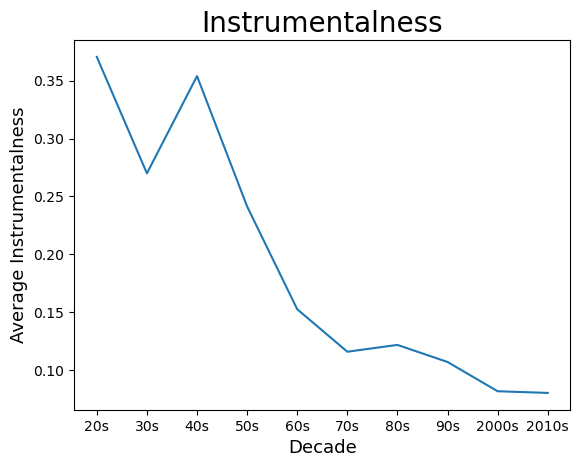

,instrumentalness
Decade,
20s,0.370365
30s,0.269956
40s,0.353832
50s,0.241384
60s,0.152754
70s,0.116118
80s,0.121991
90s,0.107280
2000s,0.082040


In [75]:
plt.plot(labels, decade_instrumentalness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Instrumentalness", fontdict={"fontsize": 13})
plt.title("Instrumentalness", fontdict={"fontsize": 20})
plt.show()

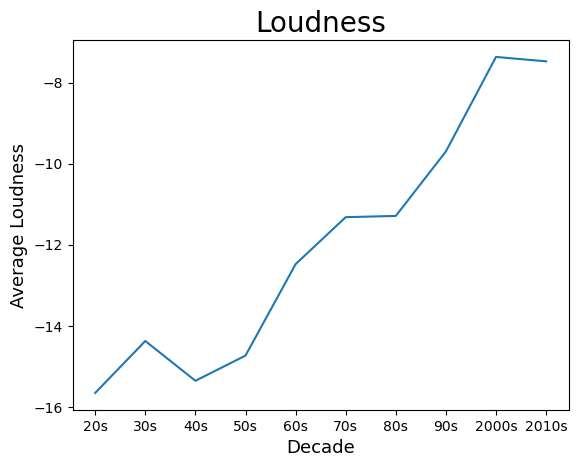

In [67]:
plt.plot(labels, decade_loudness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Loudness", fontdict={"fontsize": 13})
plt.title("Loudness", fontdict={"fontsize": 20})
plt.show()

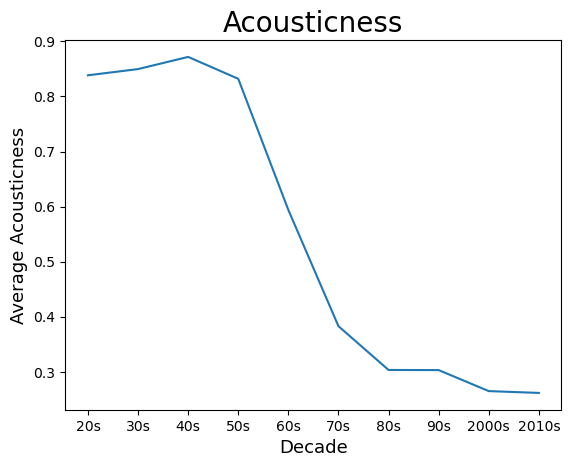

In [13]:
plt.plot(labels, decade_acousticness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Acousticness", fontdict={"fontsize": 13})
plt.title("Acousticness", fontdict={"fontsize": 20})
plt.show()

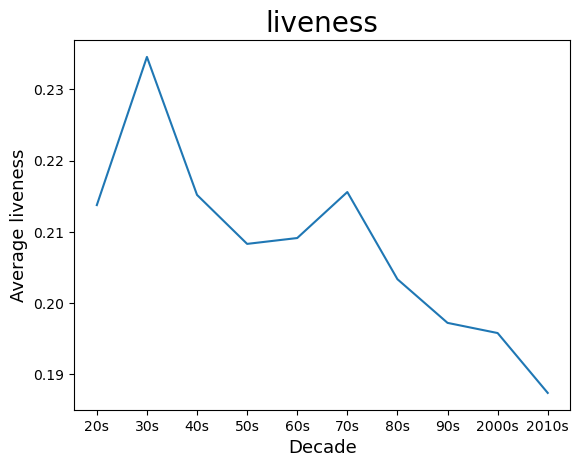

In [91]:
plt.plot(labels, decade_liveness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average liveness", fontdict={"fontsize": 13})
plt.title("liveness", fontdict={"fontsize": 20})
plt.show()

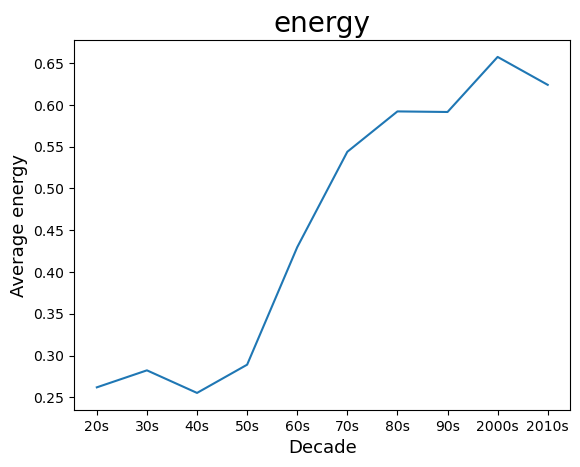

In [92]:
plt.plot(labels, decade_energy)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average energy", fontdict={"fontsize": 13})
plt.title("energy", fontdict={"fontsize": 20})
plt.show()

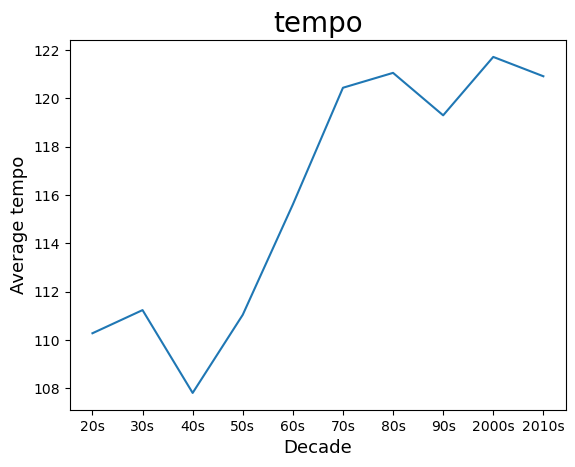

In [93]:
plt.plot(labels, decade_tempo)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average tempo", fontdict={"fontsize": 13})
plt.title("tempo", fontdict={"fontsize": 20})
plt.show()

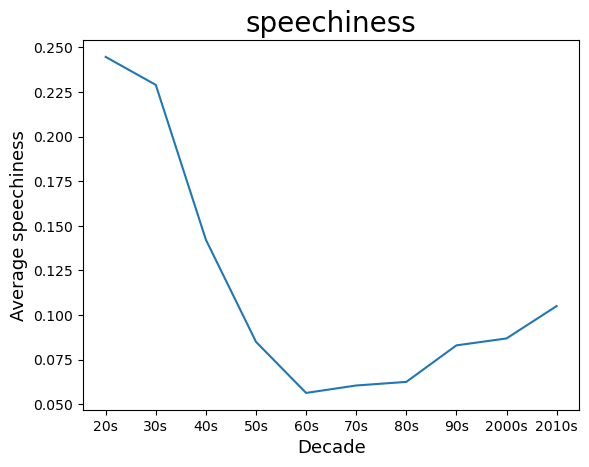

In [94]:
plt.plot(labels, decade_speechiness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average speechiness", fontdict={"fontsize": 13})
plt.title("speechiness", fontdict={"fontsize": 20})
plt.show()

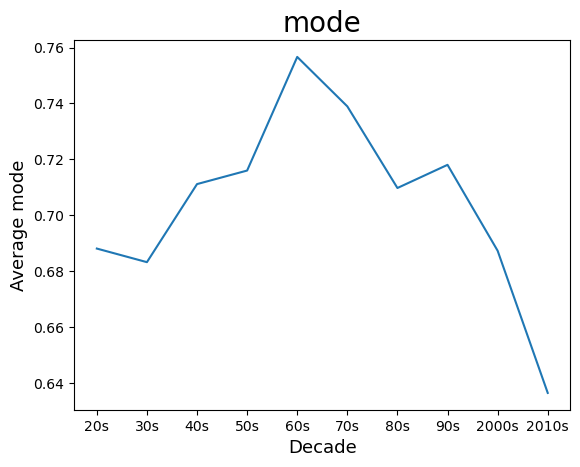

In [95]:
plt.plot(labels, decade_mode)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average mode", fontdict={"fontsize": 13})
plt.title("mode", fontdict={"fontsize": 20})
plt.show()

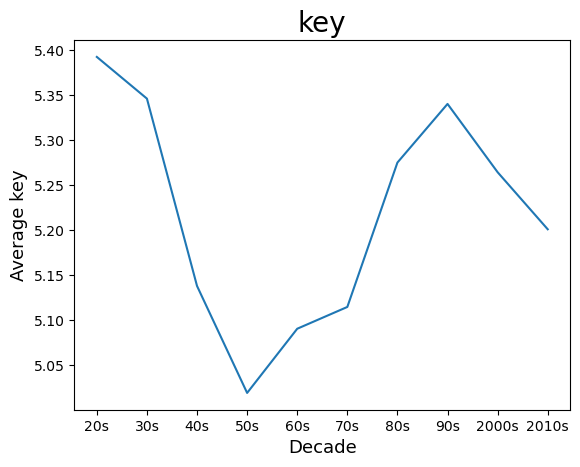

In [96]:
plt.plot(labels, decade_key)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average key", fontdict={"fontsize": 13})
plt.title("key", fontdict={"fontsize": 20})
plt.show()

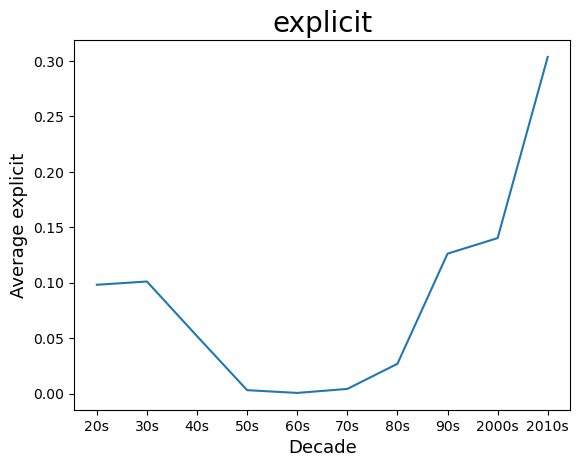

In [97]:
plt.plot(labels, decade_explicit)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average explicit", fontdict={"fontsize": 13})
plt.title("explicit", fontdict={"fontsize": 20})
plt.show()

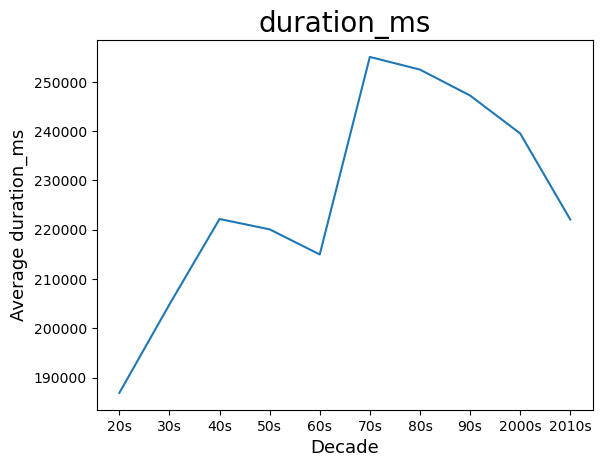

In [98]:
plt.plot(labels, decade_duration_ms)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average duration_ms", fontdict={"fontsize": 13})
plt.title("duration_ms", fontdict={"fontsize": 20})
plt.show()

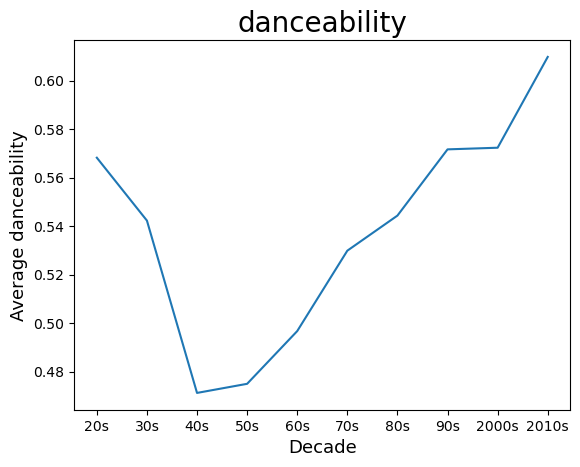

In [99]:
plt.plot(labels, decade_danceability)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average danceability", fontdict={"fontsize": 13})
plt.title("danceability", fontdict={"fontsize": 20})
plt.show()

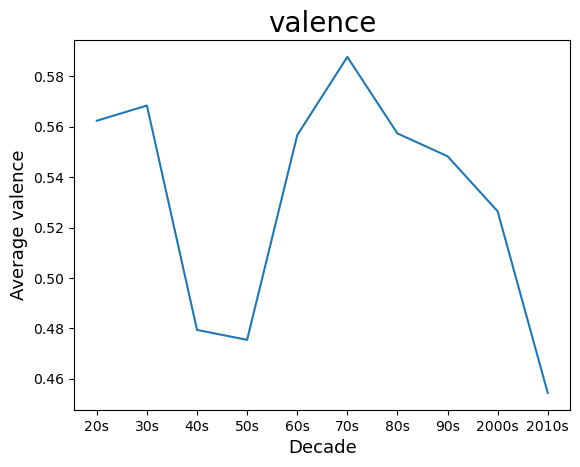

In [100]:
plt.plot(labels, decade_valence)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average valence", fontdict={"fontsize": 13})
plt.title("valence", fontdict={"fontsize": 20})
plt.show()